In [57]:
import pandas as pd

In [58]:
data = pd.read_csv('./data/cc_approvals.data')

In [59]:
df = pd.DataFrame(data=data)

In [60]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [61]:
column_names = ['Gender',
'Age',
'Debt',
'Married',
'BankCustomer',
'EducationLevel',
'Ethnicity',
'YearsEmployed',
'PriorDefault',
'Employed',
'CreditScore',
'DriversLicense',
'Citizen',
'ZipCode',
'Income',
'ApprovalStatus']

In [62]:
df.columns = column_names

In [63]:
df.head(15)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [64]:
# Relevante Spalten auswählen
df = df[["Gender", "Age", "Debt", "Married", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Income", "ApprovalStatus"]]

In [65]:
df.head(5)

,Gender,Age,Debt,Married,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,ApprovalStatus
0,a,58.67,4.460,u,3.04,t,t,6,f,560,+
1,a,24.50,0.500,u,1.50,t,f,0,f,824,+
2,b,27.83,1.540,u,3.75,t,t,5,t,3,+
3,b,20.17,5.625,u,1.71,t,f,0,f,0,+
4,b,32.08,4.000,u,2.50,t,f,0,t,0,+


In [66]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Income              int64
ApprovalStatus     object
dtype: object

In [67]:
df.info

<bound method DataFrame.info of     Gender    Age    Debt Married  YearsEmployed PriorDefault Employed  \
0        a  58.67   4.460       u           3.04            t        t   
1        a  24.50   0.500       u           1.50            t        f   
2        b  27.83   1.540       u           3.75            t        t   
3        b  20.17   5.625       u           1.71            t        f   
4        b  32.08   4.000       u           2.50            t        f   
..     ...    ...     ...     ...            ...          ...      ...   
684      b  21.08  10.085       y           1.25            f        f   
685      a  22.67   0.750       u           2.00            f        t   
686      a  25.25  13.500       y           2.00            f        t   
687      b  17.92   0.205       u           0.04            f        f   
688      b  35.00   3.375       u           8.29            f        f   

     CreditScore DriversLicense  Income ApprovalStatus  
0              6      

In [68]:
df.shape

(689, 11)

In [69]:
#Numer approved
df_approved = df.loc[df["ApprovalStatus"] == '+']

In [70]:
df_approved.shape

(306, 11)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [72]:
# Kategorische Daten in nummerische
label_encoders = {}
for column in ["Gender", "Married", "PriorDefault", "Employed", "DriversLicense", "ApprovalStatus"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [73]:
df.head(3)

,Gender,Age,Debt,Married,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,ApprovalStatus
0,1,58.67,4.46,2,3.04,1,1,6,0,560,0
1,1,24.50,0.50,2,1.50,1,0,0,0,824,0
2,2,27.83,1.54,2,3.75,1,1,5,1,3,0


In [74]:
df.dtypes

Gender              int64
Age                object
Debt              float64
Married             int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Income              int64
ApprovalStatus      int64
dtype: object

In [75]:
# Zeilen mit fehlendem Alter entfernen
df = df.loc[df["Age"]!='?']

In [76]:
# Datentypen von Alter in float ändern
df["Age"] = df["Age"].astype(float)

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_12539/2805016975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].astype(float)


In [77]:
df.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Income              int64
ApprovalStatus      int64
dtype: object

In [78]:
#Zielvariable definieren
X = df.drop("ApprovalStatus", axis=1)
y = df["ApprovalStatus"]

In [79]:
# In test und trainingsdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Daten skalieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy * 100:.2f}%")

Genauigkeit: 81.62%


In [83]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

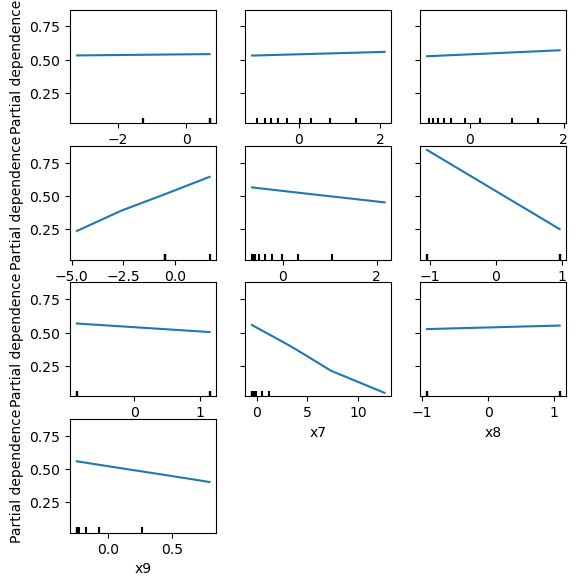

In [84]:
features = [0,1,2,3,4,5,6,7,8,9]

# Erstellen des PDPs mit PartialDependenceDisplay.from_estimator
display = PartialDependenceDisplay.from_estimator(model, X_train, features)
plt.subplots_adjust(top=1.2)
plt.show()
